# Reporte Semanal

## Carga de Datos desde Access
En este segmento de código se importan las librerias y se cargan los datos directamente desde Access

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def cargar_tablas_base():
    archivo_access = 'D:/concentrado 2000-2025.mdb'
    try:
        import pyodbc
        conn_str = (
            r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
            r'DBQ=' + archivo_access + ';'
        )
        conn = pyodbc.connect(conn_str)
        quejas = pd.read_sql("SELECT * FROM [Quejas]", conn)
        expediente = pd.read_sql("SELECT * FROM [Expediente]", conn)
        recomendaciones = pd.read_sql("SELECT * FROM [Recomendaciones]", conn)
        norecomendaciones = pd.read_sql("SELECT * FROM [NoRecomendaciones]", conn)
        
        conn.close()
        print("Tablas base cargadas desde Access")
        return quejas, expediente, recomendaciones, norecomendaciones
        
    except Exception as e:
        print(f"Error al conectar con Access: {e}")
        return

def crear_ficha_001_expedientes(quejas, expediente):
    # Hacer el JOIN entre Quejas y Expediente por medio del ID .Expediente
    ficha_001 = pd.merge(
        quejas,
        expediente,
        left_on='Expediente',
        right_on='Expediente',
        how='inner',
        suffixes=('', '_expediente')
    )
    # Filtrar expedientes de 2025
    ficha_001 = ficha_001[ficha_001['Expediente'].str.contains('/2025', na=False)]
    # Ordenar
    ficha_001 = ficha_001.sort_values(['FechaInicio', 'Expediente'])
    return ficha_001

def crear_ficha_001_expedientes2(ficha_001):
    # Columnas que necesitamos para Ficha-001-Expedientes2
    columnas = [
        'Expediente', 
        'SubProcu', 
        'FechaInicio', 
        'LugarProcedencia', 
        'Recepcion', 
        'Conclusión', 
        'F_Conclusion', 
        'Organismo emisor', 
        'Alias_Conclusión', 
        'Alias_expediente', 
        'GrupoVulnerable'
    ]
    # Crear el dataframe
    df = ficha_001[columnas].drop_duplicates()
    return df
# CARGAR Y PROCESAR DATOS
print("Cargando tablas base desde Access...")
quejas, expediente, recomendaciones, norecomendaciones = cargar_tablas_base()
ficha_001 = crear_ficha_001_expedientes(quejas, expediente)
df = ficha_001.copy()
df2 = crear_ficha_001_expedientes2(ficha_001)

Cargando tablas base desde Access...


C:\Users\PRODHEG\AppData\Local\Temp\ipykernel_33072\1515767151.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quejas = pd.read_sql("SELECT * FROM [Quejas]", conn)
C:\Users\PRODHEG\AppData\Local\Temp\ipykernel_33072\1515767151.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  expediente = pd.read_sql("SELECT * FROM [Expediente]", conn)
C:\Users\PRODHEG\AppData\Local\Temp\ipykernel_33072\1515767151.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recomendaciones = pd.read_sql("SELECT * FROM [Recomendaciones]", co

Tablas base cargadas desde Access


## Procesamiento de datos

In [2]:
# VERIFICAR ESTRUCTURA
col_direccion = 'DireccionMunicipal'
col_dependencia = 'Dependencia'
col_municipio = 'Municipio'
print("DATASET: Ficha-001-Expedientes (df)") 
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print("Columnas:")
print(df.columns.tolist())

print("=" * 60)
print("DATASET: Ficha-001-Expedientes2 (df2)")
print(f"Dimensiones: {df2.shape[0]} filas x {df2.shape[1]} columnas")
print("Columnas:")
print(df2.columns.tolist())

DATASET: Ficha-001-Expedientes (df)
Dimensiones: 2599 filas x 42 columnas
Columnas:
['Expediente', 'FechaInicio', 'Dependencia', 'Municipio', 'LugarProcedencia', 'Hecho', 'Recepcion', 'Personas', 'Subprocu', 'Observaciones', 'Autoridad', 'GrupoVulnerable', 'MujerAgraviada', 'Organismo emisor', 'DireccionMunicipal', 'AliasDependencia', 'AliasDependenciaActuallizado', 'TipoDependencia', 'AliasDependenciaAuxiliar', 'CiudadDeLosHechos', 'Conclusión', 'F_Conclusion', 'SubProcu', 'F_EntradaSG', 'Alias_expediente', 'Alias_Conclusión', 'Alias_Motivo', 'ExpHomologo', 'Fecha de Inicio', 'Tipo de Violencia', 'AmbitoModalidadViolencia', 'LugarProcedencia_expediente', 'Recepcion_expediente', 'Personas_expediente', 'GrupoVulnerable_expediente', 'MujerAgraviada_expediente', 'Organismo emisor_expediente', 'Acumulado', 'Notas', 'Notificado', 'FuenteDeRegistro', 'CiudadDeLosHechos_expediente']
DATASET: Ficha-001-Expedientes2 (df2)
Dimensiones: 2454 filas x 11 columnas
Columnas:
['Expediente', 'SubProcu'

## Resultados

### Número de Expedientes

In [3]:
conteo = df2['Recepcion'].value_counts()
conteo = conteo.get('Oficiosa', 0)
print ("="*35)
print (f"Expedientes Iniciados en 2025: {df2.shape[0]+1}")
print (f"Expedientes Oficiosos en 2025: {conteo}")
print ("="*35)

Expedientes Iniciados en 2025: 2455
Expedientes Oficiosos en 2025: 31


### Distribución de Quejas por zonas

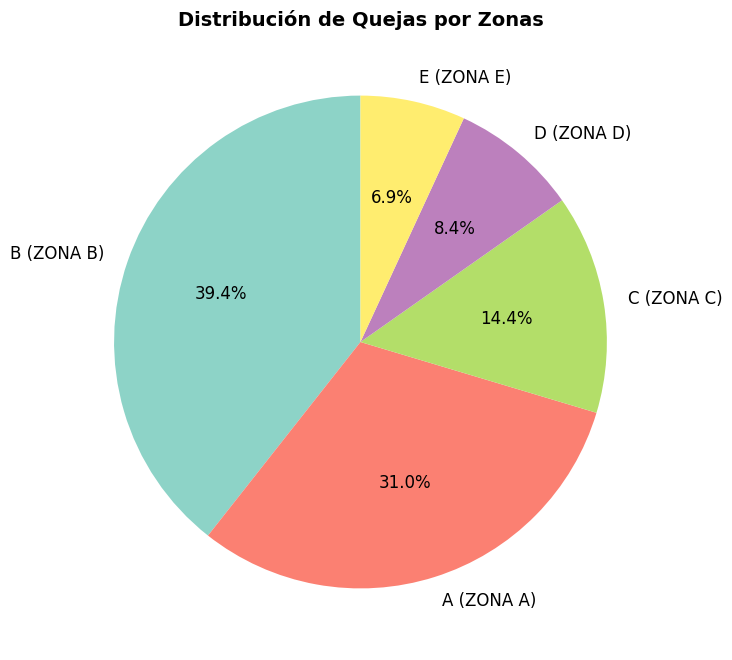

In [4]:
plt.figure(figsize=(8, 8))
df2['SubProcu'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colormap='Set3',
    fontsize=12
)
plt.title('Distribución de Quejas por Zonas', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.savefig('plot_zonas.png', dpi=300, bbox_inches='tight')
plt.show()

### Autoridades Más Señaladas

In [5]:
conteo = df.drop_duplicates(subset=['Expediente', 'DireccionMunicipal', 'Municipio'], keep='first')
conteo = conteo['DireccionMunicipal'].value_counts().head(7)
conteo = conteo.sort_values(ascending=False)
print(conteo.to_string())

plt.figure(figsize=(12, 8))
conteo = conteo.sort_values(ascending=True)
bars = plt.barh(conteo.index, conteo.values, color='steelblue', edgecolor='navy', alpha=0.8)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', fontweight='bold')
    
plt.title('Top 7 Autoridades Señaladas', fontsize=16, fontweight='bold')
plt.xlabel('Número de Señalamientos', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot_autoridades.png', dpi=300, bbox_inches='tight')
plt.close()

DireccionMunicipal
Comisión Estatal de Atención Integral a Víctimas de Guanajuato                       778
Poder Ejecutivo del Estado de Guanajuato                                             370
Dependencia Municipal de Seguridad Pública                                           171
Titular de la Presidencia Municipal                                                  167
PAS - PERSONAL EN FUNCIONES ADMINISTRATIVAS DE LA SECRETARÍA DE SEGURIDAD PÚBLICA    109
MP - PERSONAL ADSCRITO A LAS AGENCIAS DEL MINISTERIO PÚBLICO                         108
SEG - PERSONAL DE LA SECRETARÍA DE EDUCACIÓN DE GUANAJUATO                           102


### Autoridades Municipales Más Señaladas

In [6]:
conteo = df.drop_duplicates(subset=['Expediente', 'DireccionMunicipal', 'Municipio'], keep='first')
conteo = conteo[
    (conteo[col_municipio] != 'Estatal') & 
    (conteo[col_municipio] != 'Federal') & 
    ~conteo[col_municipio].str.startswith('autoridad', na=False) &
    ~conteo[col_municipio].str.startswith('Indet', na=False) &
    ~conteo[col_municipio].str.startswith('null', na=False) &
    conteo[col_municipio].notna()
]
conteo = conteo['DireccionMunicipal'].value_counts().head(9)
conteo = conteo.sort_values(ascending=False)
print(conteo.to_string())

#Esto solo es para generar la gráfica
ficha_006 = df.groupby(['Expediente', col_direccion, col_municipio]).agg(
    CuentaDeDependencia=(col_dependencia, 'count')
).reset_index()
ficha_006 = ficha_006[~ficha_006[col_municipio].str.startswith('Indet', na=False)]
ficha_006 = ficha_006.sort_values('CuentaDeDependencia', ascending=False)
ficha_006_filtrada = ficha_006[
    (ficha_006[col_municipio] != 'Estatal') & 
    (ficha_006[col_municipio] != 'Federal') & 
    (~ficha_006[col_municipio].str.startswith('autoridad', na=False)) &
    (~ficha_006[col_municipio].str.startswith('null', na=False))
]
conteo_final = ficha_006_filtrada[col_direccion].value_counts().reset_index()
conteo_final.columns = ['DireccionMunicipal', 'CuentaDeDireccionMunicipal']
conteo_final = conteo_final.sort_values(
    by=['CuentaDeDireccionMunicipal', 'DireccionMunicipal'], 
    ascending=[False, True]
)
conteo_grafica = conteo_final.head(9).sort_values('CuentaDeDireccionMunicipal', ascending=True)
plt.figure(figsize=(14, 10))
bars = plt.barh(conteo_grafica['DireccionMunicipal'], 
                conteo_grafica['CuentaDeDireccionMunicipal'],
                color='#2E86AB', alpha=0.8, edgecolor='#1C4E63')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', 
             fontweight='bold', fontsize=10)
plt.title('Top 15 Autoridades Municipales más Señaladas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de Señalamientos', fontsize=12, fontweight='bold')
plt.ylabel('Dirección Municipal', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('plot_autoridades_municipales.png', dpi=300, bbox_inches='tight')
plt.close()

DireccionMunicipal
Dependencia Municipal de Seguridad Pública                171
Titular de la Presidencia Municipal                       167
Dirección de Tránsito Municipal                            12
Sistema de Agua Potable y Alcantarillado del Municipio     12
Sistema DIF del Municipio                                  10
Personal del Municipio                                      9
Ayuntamiento Municipal                                      8
Contraloría Municipal                                       8
Instituto Municipal de las Mujeres                          7


### Autoridades Estatales Más Señaladas

In [7]:
conteo = df.drop_duplicates(subset=['Expediente', 'DireccionMunicipal', 'Municipio'], keep='first')
conteo = conteo[conteo['Municipio'] == 'Estatal']
conteo = conteo['DireccionMunicipal'].value_counts().head(9)
conteo = conteo.sort_values(ascending=False)
print(conteo.to_string())

#Esto solo es para generar la gráfica
ficha_006_estatal = ficha_006[ficha_006['Municipio'] == 'Estatal']
conteo_estatal = ficha_006_estatal['DireccionMunicipal'].value_counts().reset_index()
conteo_estatal.columns = ['DireccionMunicipal', 'CuentaDeDireccionMunicipal']
conteo_estatal = conteo_estatal.sort_values(
    by=['CuentaDeDireccionMunicipal', 'DireccionMunicipal'], 
    ascending=[False, True]
)
conteo_grafica = conteo_estatal.head(9).sort_values('CuentaDeDireccionMunicipal', ascending=True)
plt.figure(figsize=(14, 10))
bars = plt.barh(conteo_grafica['DireccionMunicipal'], 
                conteo_grafica['CuentaDeDireccionMunicipal'],
                color='#DC143C', alpha=0.8, edgecolor='#8B0000')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', 
             fontweight='bold', fontsize=10)

plt.title('Top 8 Autoridades Estatales más Señaladas', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de Señalamientos', fontsize=12, fontweight='bold')
plt.ylabel('Dirección Municipal', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('plot_autoridades_estatales.png', dpi=300, bbox_inches='tight')
plt.close()

DireccionMunicipal
Comisión Estatal de Atención Integral a Víctimas de Guanajuato                       778
Poder Ejecutivo del Estado de Guanajuato                                             370
PAS - PERSONAL EN FUNCIONES ADMINISTRATIVAS DE LA SECRETARÍA DE SEGURIDAD PÚBLICA    109
MP - PERSONAL ADSCRITO A LAS AGENCIAS DEL MINISTERIO PÚBLICO                         108
SEG - PERSONAL DE LA SECRETARÍA DE EDUCACIÓN DE GUANAJUATO                           102
POS - PERSONAL EN FUNCIONES OPERATIVAS DE LA SECRETARÍA DE SEGURIDAD PÚBLICA         101
Secretaría de Salud del Estado                                                        70
PAF - PERSONAL ADSCRITO A OTRAS ÁREAS DE LA FISCALÍA GENERAL DEL ESTADO               67
AIC - PERSONAL ADSCRITO A LAS AGENCIAS DE INVESTIGACIÓN CRIMINAL                      59


### Autoridades Federales Más Señaladas

In [8]:
conteo = df.drop_duplicates(subset=['Expediente', 'DireccionMunicipal', 'Municipio'], keep='first')
conteo = conteo[conteo['Municipio'] == 'Federal']
conteo = conteo['DireccionMunicipal'].value_counts().head(8)
conteo = conteo.sort_values(ascending=False)
print(conteo.to_string())

#Esto solo es para generar la gráfica
ficha_006_federal = ficha_006[ficha_006[col_municipio] == 'Federal']
conteo_federal = ficha_006_federal[col_direccion].value_counts().reset_index()
conteo_federal.columns = ['DireccionMunicipal', 'CuentaDeDireccionMunicipal']
conteo_federal = conteo_federal.sort_values(
    by=['CuentaDeDireccionMunicipal', 'DireccionMunicipal'], 
    ascending=[False, True]
)

plt.figure(figsize=(14, 10))
conteo_grafica = conteo_federal.head(8).sort_values('CuentaDeDireccionMunicipal', ascending=True)
bars = plt.barh(conteo_grafica['DireccionMunicipal'], 
                conteo_grafica['CuentaDeDireccionMunicipal'],
                color='#DC143C', alpha=0.8, edgecolor='#8B0000')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', 
             fontweight='bold', fontsize=10)

plt.title('Top 15 Autoridades Federales más Señaladas', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de Señalamientos', fontsize=12, fontweight='bold')
plt.ylabel('Dirección Municipal', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('plot_autoridades_federales.png', dpi=300, bbox_inches='tight')
plt.close()

DireccionMunicipal
Secretaría de Seguridad y Protección Ciudadana (Guardia Nacional)                                  16
Secretaría de Gobernación (Comisión Nacional de Búsqueda)                                          12
IMSS (Instituto Mexicano del Seguro Social)                                                        10
SSPF (CEFERESOS, Órgano Administrativo Desconcentrado Prevención y Readaptación Social Federal)     4
FGR (Fiscalía General de la República)                                                              3
INFONAVIT (Instituto del Fondo Nacional de la Vivienda para los Trabajadores)                       2
ISSSTE (Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado)                 2
SEDENA (Secretaría de la Defensa Nacional)                                                          2


### Municipios con Más Señalamientos

In [9]:
# Réplica exacta del flujo SQL en tu estilo
ficha_006 = df.groupby(['Expediente', 'DireccionMunicipal', 'Municipio'])['Dependencia'].count().reset_index(name='CuentaDeDependencia')
ficha_006 = ficha_006[~ficha_006['Municipio'].str.startswith('indet', na=False)]
ficha_006 = ficha_006.sort_values('CuentaDeDependencia', ascending=False)

municipio = ficha_006['Municipio'].value_counts().reset_index()
municipio.columns = ['Municipio', 'CuentaDeMunicipio']

exclusion = ['Estatal', 'Federal', 'Indeterminado']
municipio = municipio[
    (~municipio['Municipio'].isin(exclusion)) &
    (~municipio['Municipio'].str.startswith('autoridad', na=False))
].head(10)
print(municipio.to_string(index=False))

# Generar Gráfica
plt.figure(figsize=(12, 8))
municipio_grafica = municipio.sort_values('CuentaDeMunicipio', ascending=True)
# Usar las columnas correctas del dataframe
bars = plt.barh(municipio_grafica['Municipio'], 
                municipio_grafica['CuentaDeMunicipio'], 
                color='steelblue', edgecolor='navy', alpha=0.8)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', fontweight='bold')
plt.title('Top 7 Municipios con más Señalamientos', fontsize=16, fontweight='bold')
plt.xlabel('Número de Señalamientos', fontsize=12, fontweight='bold')
plt.ylabel('Municipio', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot_municipios.png', dpi=300, bbox_inches='tight')
plt.close()

            Municipio  CuentaDeMunicipio
            Salamanca                156
                 León                112
             Irapuato                 27
               Celaya                 22
           Guanajuato                 18
San Miguel de Allende                 17
             Acámbaro                 14
       Apaseo el Alto                 13
                 null                 11
    Valle de Santiago                  7


### Resoluciones Notificadas

In [10]:
recomendaciones['FechaRecom'] = pd.to_datetime(recomendaciones['FechaRecom'], errors='coerce')
recom = recomendaciones[recomendaciones['FechaRecom'].dt.year == 2025]
recom2 = recom[['Expediente', 'FechaRecom']].drop_duplicates()

norecomendaciones['Fecha_NR'] = pd.to_datetime(norecomendaciones['Fecha_NR'], errors='coerce')
norec = norecomendaciones[norecomendaciones['Fecha_NR'].dt.year == 2025]
norec2 = norec.drop_duplicates(subset=['Expediente', 'Fecha_NR', 'Consecutivo'], keep='first')

print ("="*35)
print (f"Recomendaciones: {recom2.shape[0]}")
print (f"No Recomendaciones: {norec2.shape[0]}")
print ("="*35)

Recomendaciones: 163
No Recomendaciones: 199


### Autoridades Dirigidas en Recomendaciones

In [11]:
cuenta=recom['Autoridad'].value_counts().head(9)
print(cuenta.to_string())

Autoridad
Titular de la Comisión Estatal de Atención Integral a Víctimas de Guanajuato                              78
Fiscal General del Estado                                                                                 23
Secretario de Educación                                                                                   15
Presidente Municipal de León                                                                              12
Presidente Municipal de Celaya                                                                            10
Secretario de Seguridad Pública                                                                            7
Presidente Municipal de Irapuato                                                                           2
Titular de la Comisión Estatal de Atención Integral a Víctimas de Guanajuato,Fiscal General del Estado     2
Secretario de Salud                                                                                        2


### Hechos Determinados en las Resoluciones

In [12]:
# INNER JOIN
merged = pd.merge(recom2, quejas, on='Expediente', how='inner')
filtro = (
    # Se usa Observaciones_y porque es el que corresponde a Quejas.Observaciones
    merged['Observaciones'].isna() |
    (~merged['Observaciones'].str.contains('extra-|desglose', case=False, na=False))
)
resultado = (
    merged[filtro]
    .groupby('Hecho')
    .size()
    .reset_index(name='CuentaDeHecho')
    .sort_values('CuentaDeHecho', ascending=False)
)
print(resultado.head(9).to_string(index=False))

                                                                                  Hecho  CuentaDeHecho
                                 Violación de Derechos Humanos de las Personas Víctimas             78
                                  Violación del derecho al interés superior de la niñez             27
                                          Violación del Derecho a la Seguridad Jurídica             15
                                          Violación del Derecho de Acceso a la Justicia             12
Violación al Derecho de las Mujeres a una Vida Libre de Violencia en el Entorno Laboral              9
                            Violación a los Derechos de las Niñas, Niños y Adolescentes              9
                                           Violación del Derecho a la Integridad Física              8
                                                   Violación del Derecho al Trato Digno              6
                       Violación a los Derechos de las Personas Privadas 

### Análisis Temporal de Quejas

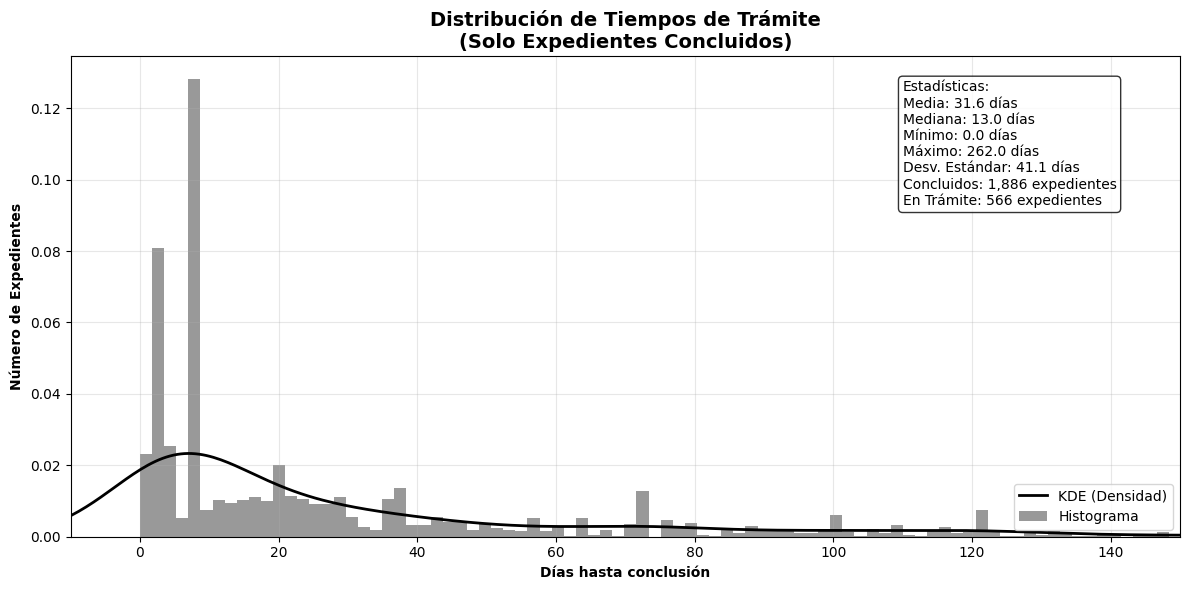

In [13]:
#Analisis de Fechas
df_fechas = df2.drop_duplicates(subset=['Expediente'], keep='first')
df_fechas = df_fechas.copy()
df_fechas.loc[:, 'FechaInicio'] = pd.to_datetime(df_fechas['FechaInicio'], errors='coerce')
df_fechas.loc[:, 'F_Conclusion'] = pd.to_datetime(df_fechas['F_Conclusion'], errors='coerce')
df_concluidos = df_fechas[df_fechas['F_Conclusion'].notna()].copy()
df_concluidos.loc[:, 'TiempoDias'] = (df_concluidos['F_Conclusion'] - df_concluidos['FechaInicio']).dt.days
df_concluidos = df_concluidos[df_concluidos['TiempoDias'] >= 0]

# Histograma y KDE con estadísticas incorporadas
plt.figure(figsize=(12, 6))
df_concluidos['TiempoDias'].plot.kde(color='black', linewidth=2, label='KDE (Densidad)')
df_concluidos['TiempoDias'].plot.hist(bins=150, density=True, alpha=0.8, color='gray', label='Histograma')
plt.title('Distribución de Tiempos de Trámite\n(Solo Expedientes Concluidos)', fontsize=14, fontweight='bold')
plt.xlabel('Días hasta conclusión', fontweight='bold')
plt.ylabel('Número de Expedientes', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(left=-10, right=150)

# Agregar estadísticas como texto
stats_text = f"""Estadísticas:
Media: {df_concluidos['TiempoDias'].mean():.1f} días
Mediana: {df_concluidos['TiempoDias'].median():.1f} días
Mínimo: {df_concluidos['TiempoDias'].min():.1f} días
Máximo: {df_concluidos['TiempoDias'].max():.1f} días
Desv. Estándar: {df_concluidos['TiempoDias'].std():.1f} días
Concluidos: {len(df_concluidos):,} expedientes
En Trámite: {len(df_fechas) - len(df_concluidos):,} expedientes"""

plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('plot_tiempos.png', dpi=300, bbox_inches='tight')
plt.show()

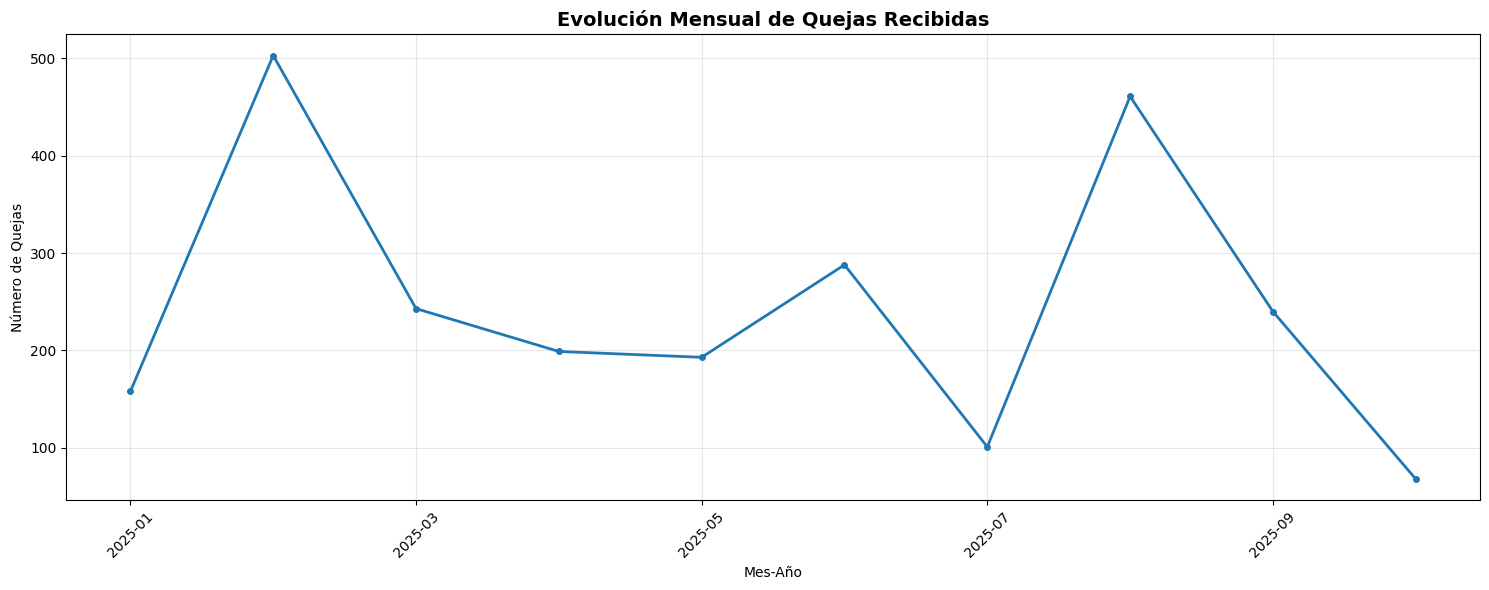

Período analizado: 2025-01 a 2025-10
Mes con más quejas: 2025-02 (503 quejas)


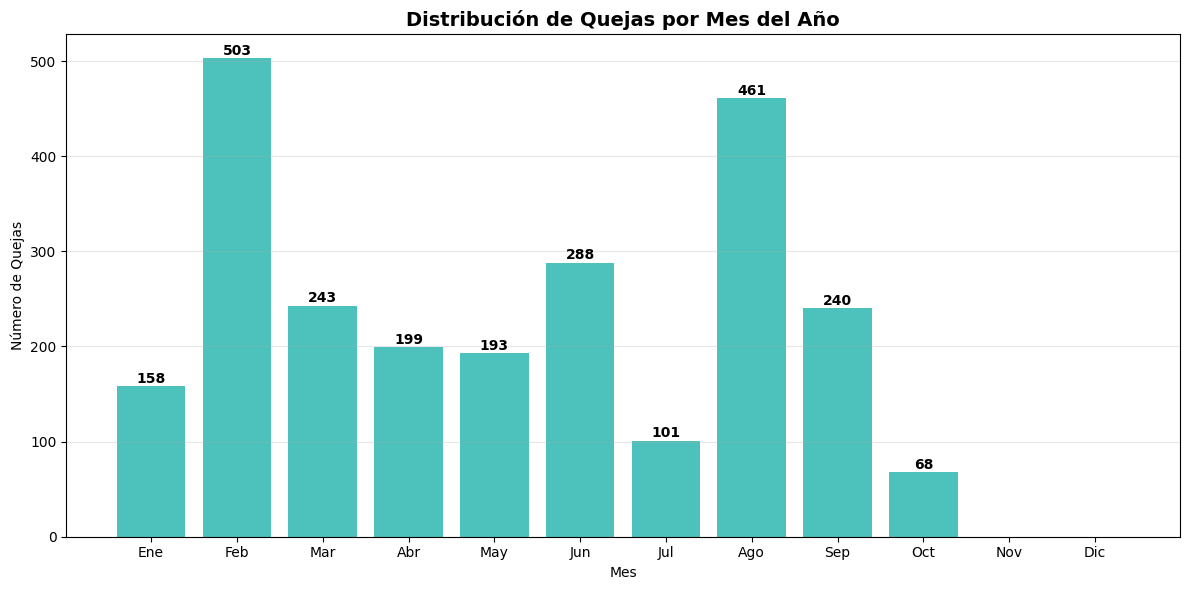

In [14]:
def analisis_temporal_avanzado(df):
    # 1. Evolución mensual de quejas
    df_copy = df.copy()
    df_copy.loc[:, 'MesAño'] = df_copy['FechaInicio'].dt.to_period('M')
    quejas_por_mes = df_copy['MesAño'].value_counts().sort_index()
    
    # Convertir Period a string para mejor visualización
    quejas_por_mes.index = quejas_por_mes.index.astype(str)
    
    plt.figure(figsize=(15, 6))
    quejas_por_mes.plot(kind='line', marker='o', linewidth=2, markersize=4)
    plt.title('Evolución Mensual de Quejas Recibidas', fontsize=14, fontweight='bold')
    plt.xlabel('Mes-Año')
    plt.ylabel('Número de Quejas')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Período analizado: {quejas_por_mes.index[0]} a {quejas_por_mes.index[-1]}")
    print(f"Mes con más quejas: {quejas_por_mes.idxmax()} ({quejas_por_mes.max()} quejas)")
    
    # 2. Estacionalidad por mes
    df_copy.loc[:, 'Mes'] = df_copy['FechaInicio'].dt.month
    quejas_por_mes_numero = df_copy['Mes'].value_counts().sort_index()
    
    # Crear array completo de meses (1-12) incluso si faltan algunos
    meses_completos = list(range(1, 13))
    conteos_completos = [quejas_por_mes_numero.get(mes, 0) for mes in meses_completos]
    
    nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                     'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(nombres_meses, conteos_completos, color='lightseagreen', alpha=0.8)
    plt.title('Distribución de Quejas por Mes del Año', fontsize=14, fontweight='bold')
    plt.xlabel('Mes')
    plt.ylabel('Número de Quejas')
    plt.grid(axis='y', alpha=0.3)
    
    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return quejas_por_mes

# Ejecutar análisis temporal
tendencias_mensuales = analisis_temporal_avanzado(df2)

### Dependencias más Señaladas por Zona

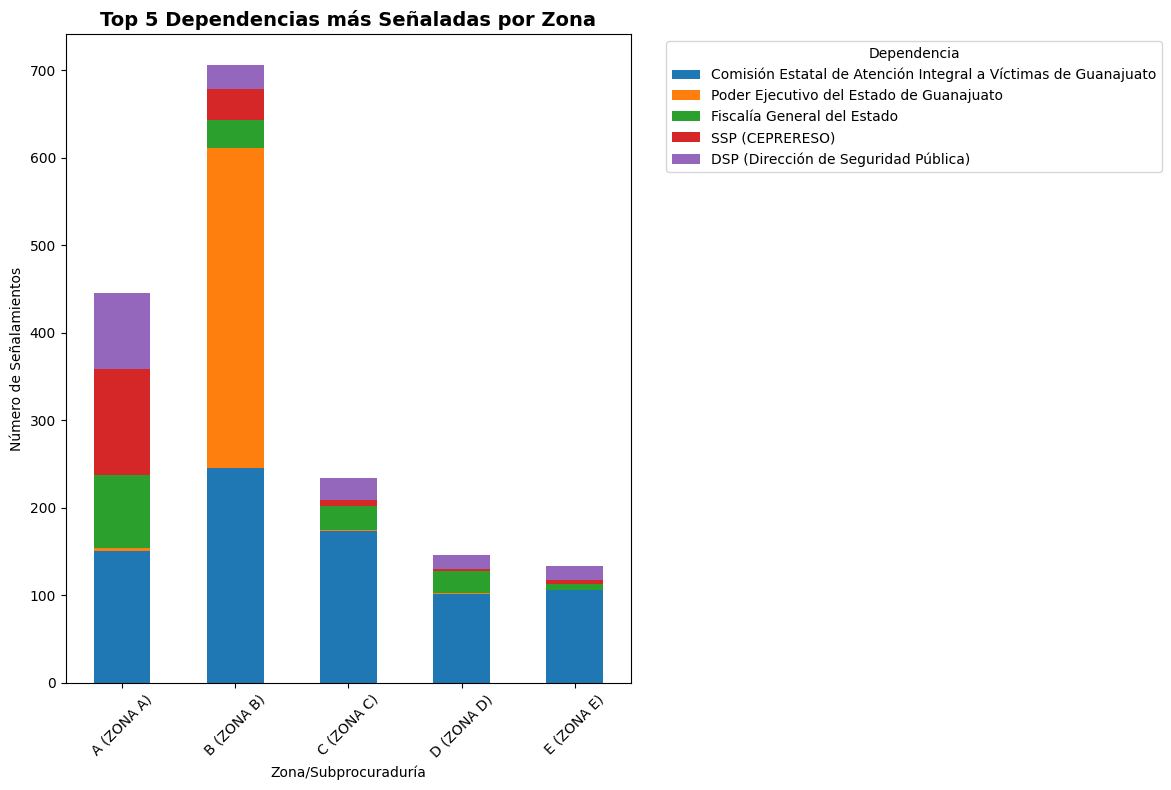

In [15]:
# Crear tabla pivote
df_dep = df.drop_duplicates(subset=['Expediente','Dependencia'], keep='first')
pivot = pd.crosstab(df_dep['SubProcu'], df_dep['Dependencia'])

top_dependencias = pivot.sum().nlargest(5).index
pivot_top = pivot[top_dependencias]

plt.figure(figsize=(12, 8))
pivot_top.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 5 Dependencias más Señaladas por Zona', fontsize=14, fontweight='bold')
plt.xlabel('Zona/Subprocuraduría')
plt.ylabel('Número de Señalamientos')
plt.legend(title='Dependencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusiones por Tipos de Salida

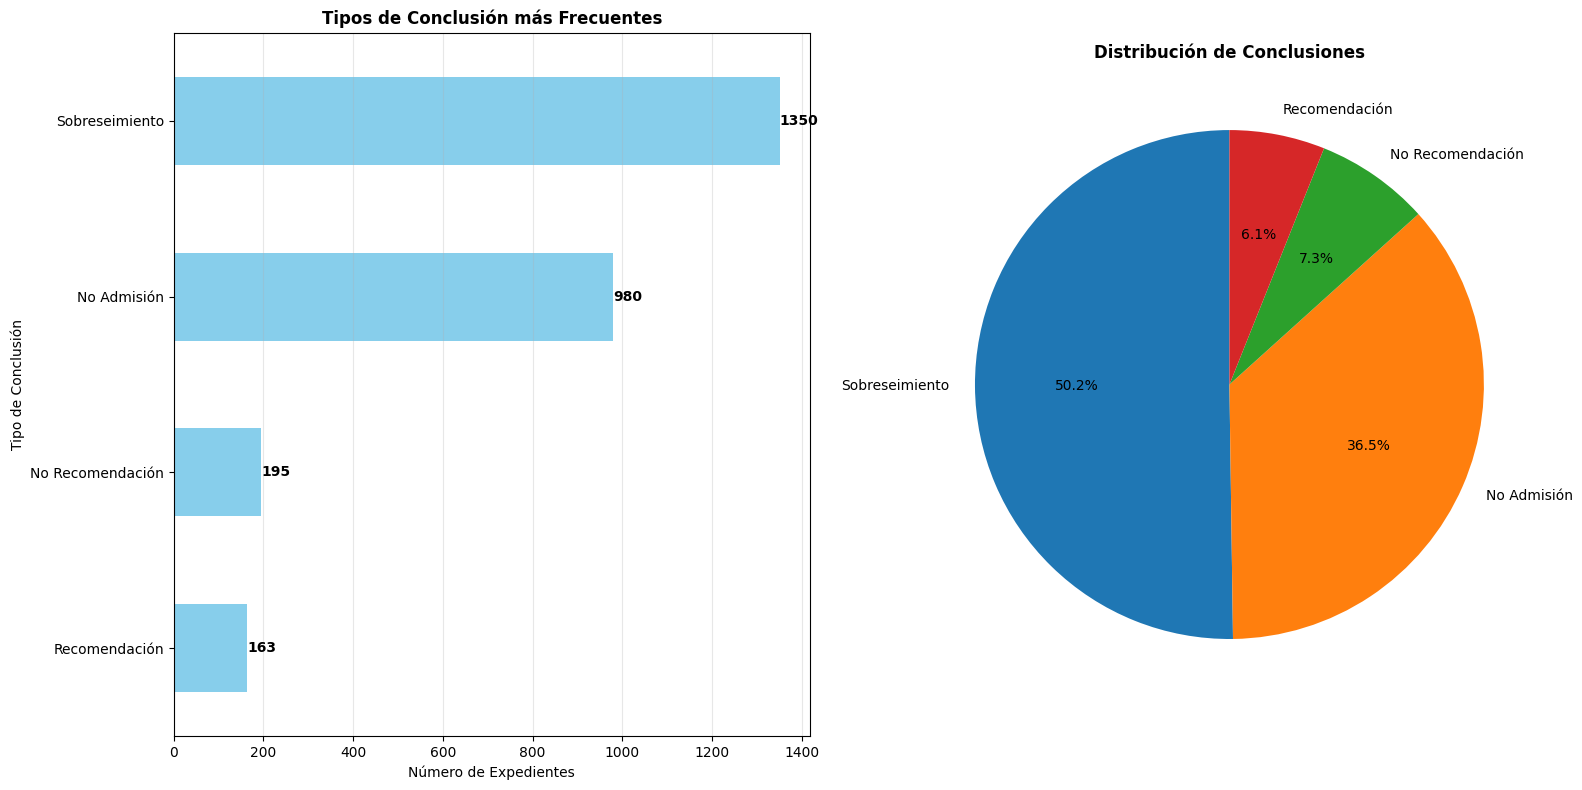

Conclusión
Sobreseimiento      1350
No Admisión          980
No Recomendación     195
Recomendación        163
 Total de conclusiones: 2688


In [16]:
df_filtrado = expediente.copy()

filtro_indeterminado = df_filtrado['Conclusión'] != "INDETERMINADO"
filtro_no_nulos = df_filtrado['Conclusión'].notna()
fecha_inicio = pd.to_datetime('2024-12-31')
filtro_fechas = (df_filtrado['F_Conclusion'] > fecha_inicio)

df_filtrado = df_filtrado[filtro_indeterminado & filtro_no_nulos & filtro_fechas]

conclusiones = df_filtrado['Conclusión'].value_counts()
        
# Construcción de Datos para Pie plot
total = conclusiones.sum()
porcentajes = (conclusiones / total * 100)
# Identificar categorías menores al 5%
menores_5pct = porcentajes[porcentajes < 5].index
mayores_5pct = porcentajes[porcentajes >= 5].index
# Crear nuevo series con "Otros" para menores al 5%
if len(menores_5pct) > 0:
    suma_otros = conclusiones[menores_5pct].sum()
    conclusiones_pie = conclusiones[mayores_5pct].copy()
    conclusiones_pie['Otros'] = suma_otros
else:
    conclusiones_pie = conclusiones.copy()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
# Gráfica de barras HORIZONTAL
conclusiones_ordenadas = conclusiones.sort_values(ascending=True)
bars = conclusiones_ordenadas.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Tipos de Conclusión más Frecuentes', fontweight='bold')
ax1.set_xlabel('Número de Expedientes')
ax1.set_ylabel('Tipo de Conclusión')
ax1.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}', 
            ha='left', va='center', 
            fontweight='bold', fontsize=10)

# Gráfica de pie CON AGRUPACIÓN
if len(conclusiones_pie) > 0:
    conclusiones_pie.head(8).plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    ax2.set_title('Distribución de Conclusiones', fontweight='bold')
    ax2.set_ylabel('')
else:
    ax2.text(0.5, 0.5, 'No hay datos\npara gráfico de pie', ha='center', va='center', transform=ax2.transAxes, fontsize=12)
plt.tight_layout()
plt.savefig('plot_conclusiones.png', dpi=300, bbox_inches='tight')
plt.show()
print(conclusiones.to_string())
print(f" Total de conclusiones: {conclusiones.sum()}")

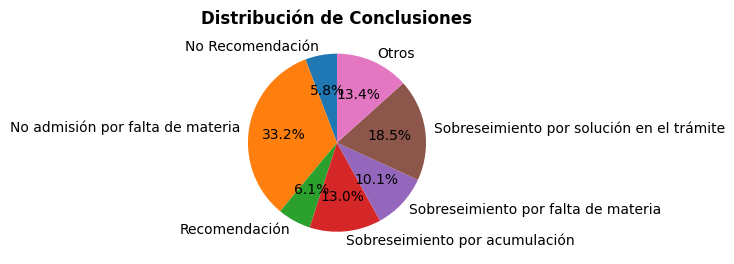

Alias_Conclusión
En trámite                                                                                        7
No Recomendación                                                                                155
No admisión por desistimiento                                                                    23
No admisión por extemporaneidad                                                                   9
No admisión por falta de materia                                                                893
No admisión por falta de materia (desinterés)                                                    17
No admisión por incompetencia                                                                     2
No admisión por incompetencia asunto jurisdiccional (remitido al Consejo del Poder Judicial)      6
No admisión por incompetencia, remitido a la CNDH                                                29
No admisión por incompetencia, remitido a otra autoridad                           

In [17]:
df_filtrado = expediente.copy()

filtro_indeterminado = df_filtrado['Alias_Conclusión'] != "INDETERMINADO"
filtro_no_nulos = df_filtrado['Alias_Conclusión'].notna()
fecha_inicio = pd.to_datetime('2024-12-31')
filtro_fechas = (df_filtrado['F_Conclusion'] > fecha_inicio)

df_filtrado = df_filtrado[filtro_indeterminado & filtro_no_nulos & filtro_fechas]

conclusiones = df_filtrado['Alias_Conclusión'].value_counts().sort_index()
        
# Construcción de Datos para Pie plot
total = conclusiones.sum()
porcentajes = (conclusiones / total * 100)
# Identificar categorías menores al 5%
menores_5pct = porcentajes[porcentajes < 5].index
mayores_5pct = porcentajes[porcentajes >= 5].index
# Crear nuevo series con "Otros" para menores al 5%
if len(menores_5pct) > 0:
    suma_otros = conclusiones[menores_5pct].sum()
    conclusiones_pie = conclusiones[mayores_5pct].copy()
    conclusiones_pie['Otros'] = suma_otros
else:
    conclusiones_pie = conclusiones.copy()
fig = plt.figure(figsize=(7, 7))
# Gráfica de pie CON AGRUPACIÓN
if len(conclusiones_pie) > 0:
    conclusiones_pie.head(8).plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.title('Distribución de Conclusiones', fontweight='bold')
    plt.ylabel('')
else:
    plt.text(0.5, 0.5, 'No hay datos\npara gráfico de pie', ha='center', va='center', transform=ax2.transAxes, fontsize=12)
plt.tight_layout()
plt.savefig('plot_conclusiones.png', dpi=300, bbox_inches='tight')
plt.show()
print(conclusiones.to_string())

### Municipios con Más Señalamientos a DSP

In [18]:
conteo = df[df['Dependencia'].str.upper().str.startswith('DSP', na=False)][['Expediente', 'Municipio', 'DireccionMunicipal']].drop_duplicates()
conteo=conteo.groupby('Municipio').size().reset_index(name='CuentaDeMunicipio')
conteo = conteo.sort_values('CuentaDeMunicipio', ascending=False)

print(conteo.head(9).to_string(index=False))

            Municipio  CuentaDeMunicipio
                 León                 71
             Irapuato                 21
           Guanajuato                 15
San Miguel de Allende                 13
       Apaseo el Alto                 12
             Acámbaro                 11
               Celaya                  6
    Valle de Santiago                  4
             Cortazar                  3
